In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folders = ["result_sf1/", "result_sf2/", "result_sf5/"]
scales = ["sf1", "sf2", "sf5"]
variations = ["all", "dates_text", "dates", "no_index", "numbers_dates", "numbers_text", "numbers", "text", "default_index"]

In [3]:
def read_log_file(path):
   filecontent = ""
   with open(path, "r") as f:
      filecontent = f.readlines()
   return filecontent


In [4]:
filecontent = read_log_file("result_sf1/results_all.log")

In [5]:
def get_query_number(line: str)->int:
   splitted = line.split(" ")
   return int(splitted[1])

def get_numbers(line: str):
   splitted = line.split(",")
   numbers = [float(number) for number in splitted]
   return numbers


In [6]:
def get_execution_times(line:str):
   splitted = line.split(":")
   text = splitted[0]
   query_number = get_query_number(text)
   numbers_text = splitted[1]
   numbers_list = get_numbers(numbers_text)

   return query_number, numbers_list
   



In [7]:
get_execution_times("Query 2 execution times in seconds: 0.154,0.153,0.152,0.148,0.153,0.148,0.153,0.152,0.151,0.149")

(2, [0.154, 0.153, 0.152, 0.148, 0.153, 0.148, 0.153, 0.152, 0.151, 0.149])

In [8]:
def get_query_numbers_and_exec_time(filecontent: list[str]):
   query_numbers = []
   execution_times = []
   for line in filecontent:
      if not "execution times" in line:
         continue
      query_number, ex_times = get_execution_times(line.strip())
      query_numbers.append(query_number)
      execution_times.append(ex_times)
   return query_numbers, execution_times

In [9]:
columns = ["scale", "avg"]

In [21]:
for scale in scales:
   df = pd.DataFrame(columns=variations)
   for variation in variations:
      folder = "result_" + scale + "/" 
      path =  folder + "results_" + variation + ".log"
      filecontent = read_log_file(path)
      query_numbers, execution_times = get_query_numbers_and_exec_time(filecontent)
      df[variation] = [np.mean(exec_time) for exec_time in execution_times]
   df.to_csv(folder + "exec_time.csv", index=False)


In [ ]:
def display_query(df: pd.DataFrame, query: int):
   if query > 22 or query < 0:
      raise ValueError()
   
   row = df.iloc[query-1]
   row.plot(kind="bar")

def display_query_for_scale(scale: str, query:int):
   path = "result_" + scale + "/" + "exec_time.csv"
   df = pd.read_csv(path)
   display_query(df, query)
   

In [23]:
df

,all,dates_text,dates,no_index,numbers_dates,numbers_text,numbers,text,default_index
0,0.1927,0.1830,0.1859,0.1847,0.1891,0.1867,0.1857,0.1860,0.1861
1,0.1969,0.1967,0.1936,0.1973,0.2024,0.2016,0.1970,0.1984,0.1960
2,0.1917,0.1910,0.1826,0.1924,0.1939,0.1977,0.1957,0.1959,0.1948
3,0.1850,0.1856,0.1832,0.1857,0.1860,0.1887,0.1913,0.1865,0.1838
4,0.1917,0.1959,0.1954,0.1984,0.2009,0.1973,0.2027,0.2036,0.1985
5,0.1802,0.1781,0.1837,0.1820,0.1879,0.1847,0.1863,0.1828,0.1848
6,0.2011,0.2036,0.1973,0.1999,0.2004,0.2001,0.2040,0.2030,0.1988
7,0.2068,0.2072,0.2007,0.1974,0.1978,0.2063,0.2055,0.2079,0.2031
8,0.2021,0.2026,0.2044,0.1989,0.2074,0.2101,0.2076,0.2094,0.1997
9,0.1905,0.1986,0.1904,0.1954,0.1992,0.1950,0.1901,0.1958,0.1954


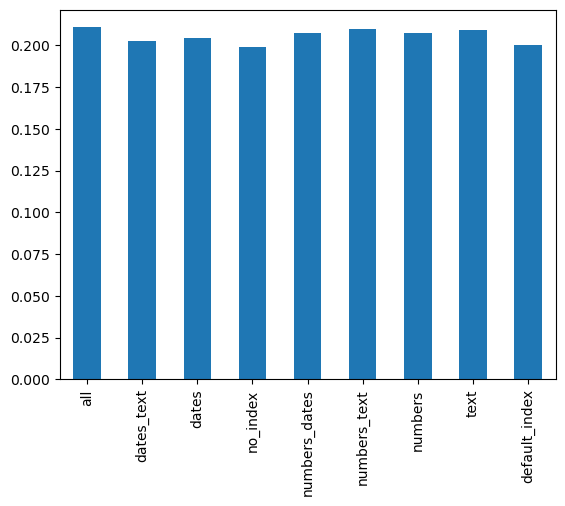

In [28]:
for scale in scales:
   folder = "result_" + scale + "/" 
   path = folder + "exec_time.csv"
   df = pd.read_csv(path)
   display_query(df, 9)

